Test set accuracy: 1.00


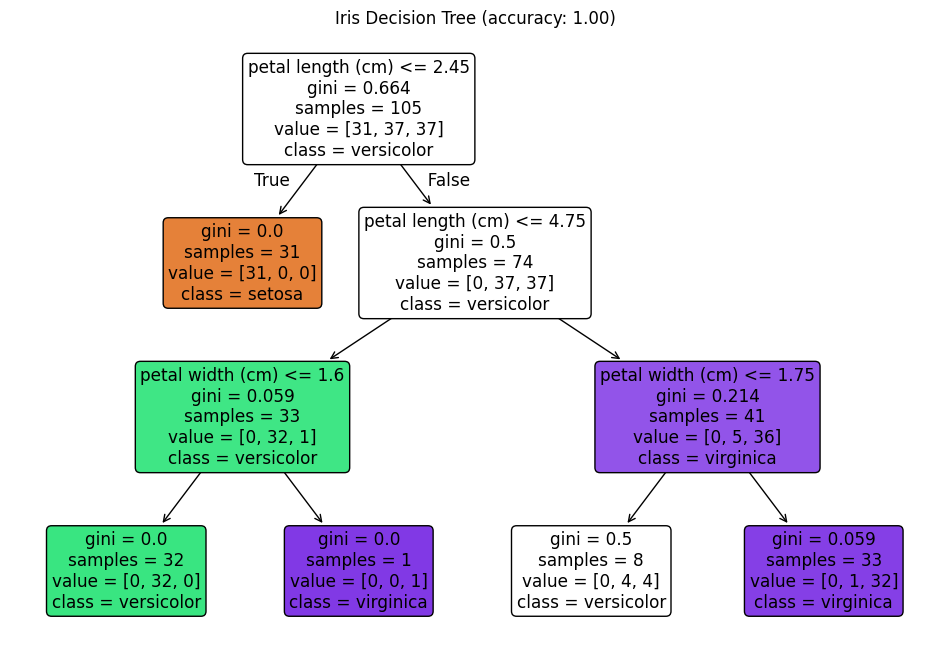


First five rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import matplotlib.pyplot as plt
import graphviz

# 1. Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# 2. Split into train/test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 4. Evaluate on the test set
accuracy = clf.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

# 5a. Export tree to Graphviz format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)


# 5b. Plot tree using matplotlib
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title(f"Iris Decision Tree (accuracy: {accuracy:.2f})")
plt.show()

# (Optional) Display first few rows of the dataset
print("\nFirst five rows of the dataset:")
print(pd.concat([X.head(), y.head()], axis=1))
